[Fashion Mnist Data Set](https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion)

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test)= fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


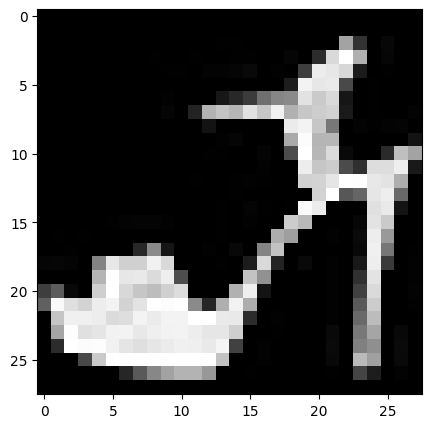

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[9], 'gray')

In [ ]:
x_train1 = x_train.reshape(60000,28*28)
x_test1 = x_test.reshape(10000,28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
data = np.concatenate((x_train1,x_test1),axis=0)
target = np.concatenate((y_train,y_test),axis=0)
print(data.shape)
print(target.shape)

(70000, 784)
(70000,)


In [ ]:
data_norm = data/255

In [ ]:
import random
import tensorflow as tf

seed = 42

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

### PCA

In [ ]:
from sklearn.decomposition import PCA

components = 2 #30 --> 5

pca = PCA(n_components = components)
pca.fit(data)
x_pca = pca.transform(data)

print('Original shape:', data.shape)
print('Reduced shape:', x_pca.shape)

Original shape: (70000, 784)
Reduced shape: (70000, 2)


### Normalization PCA data

In [ ]:
def normalization(x,xmin,xmax,ymax,ymin):
  m = (ymax - ymin)/(xmax - xmin)
  b = ymin - m*xmin

  y = m*x + b

  return y

In [ ]:
data_norm2 = normalization(x_pca,np.min(x_pca),np.max(x_pca),1,0)
data_norm2

array([[0.39577581, 0.75846119],
       [0.71209441, 0.32872531],
       [0.27227939, 0.19430282],
       ...,
       [0.3165746 , 0.27196702],
       [0.37629289, 0.13061202],
       [0.10820717, 0.44094177]])

### Model input split (784 features)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(data_norm, target, test_size= 0.1, random_state=seed, shuffle = True)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(63000, 784)
(63000,)
(7000, 784)
(7000,)


### Model input split (PCA)

In [ ]:
x_train_pca, x_test_pca, y_train_pca,y_test_pca = train_test_split(data_norm2, target, test_size= 0.1, random_state=seed, shuffle = True)

print(x_train_pca.shape)
print(y_train_pca.shape)
print(x_test_pca.shape)
print(y_test_pca.shape)

(63000, 2)
(63000,)
(7000, 2)
(7000,)


### Model input - Autoencoder

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.utils import plot_model

In [ ]:
input_data = Input(shape=(x_train.shape[1]))
encoded = Dense(512, activation='relu')(input_data)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_data,decoded)

encoder = Model(input_data,encoded)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 2)                 34    

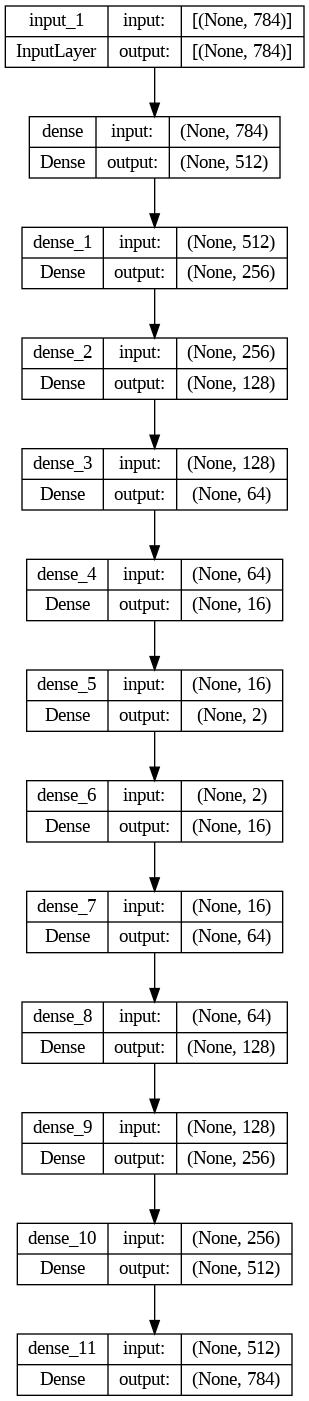

In [ ]:
autoencoder.compile(optimizer='adam', loss = 'mean_squared_error')

autoencoder.summary()

plot_model(autoencoder, to_file = 'autoencoder.jpg', show_shapes=True)

In [ ]:
history_auto = autoencoder.fit(data_norm, data_norm, epochs=60, shuffle=True)

Epoch 1/60
2188/2188 [==============================] - 20s 5ms/step - loss: 0.0359
Epoch 2/60
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0292
Epoch 3/60
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0283
Epoch 4/60
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0302
Epoch 5/60
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0277
Epoch 6/60
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0265
Epoch 7/60
2188/2188 [==============================] - 12s 5ms/step - loss: 0.0263
Epoch 8/60
2188/2188 [==============================] - 12s 5ms/step - loss: 0.0267
Epoch 9/60
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0274
Epoch 10/60
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0276
Epoch 11/60
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0279
Epoch 12/60
2188/2188 [==============================] - 11s 5ms/step - lo

Text(0.5, 0, 'Epochs')

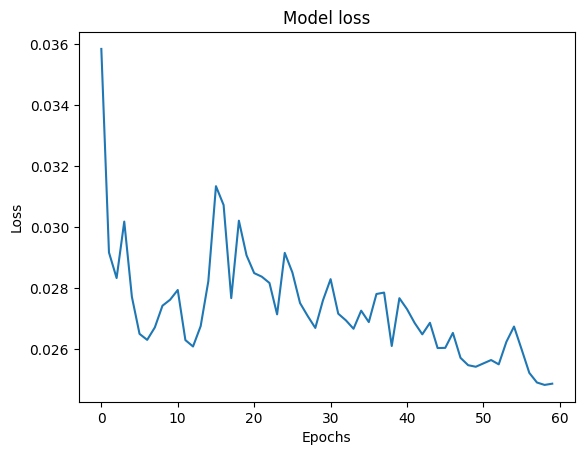

In [ ]:
plt.plot(history_auto.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
input_auto = (np.array(x_test)[0,:]).reshape(1,x_test.shape[1])
print(input_auto.shape)
print(input_auto)

result_auto = autoencoder.predict(input_auto)
print(result_auto)

(1, 784)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.14117647 0.41176471 0.56078431 0.64705882
  0.72156863 0.73333333 0.6627451  0.59215686 0.52941176 0.4745098
  0.3372549  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01176471 0.         0.17254902
  0.93333333 0.92941176 0.99215686 0.98823529 0.97647059 0.97647059
  0.98823529 0.99607843 0.99215686 0.90980392 0.97254902 0.72941176
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.01176471 0.         0.4745098  0.94901961 0.82745098
  0.8627451  0.87843137 0.99215686 1.         0.98039216 0.90588235
  0.84313725 0.86666667 0.96470588 0.95686275 0.         0.
  0.00392157 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.63529412 0.88235294 0

1/1 [==============================] - 0s 32ms/step
(1, 784)


Text(0.5, 1.0, 'Output image')

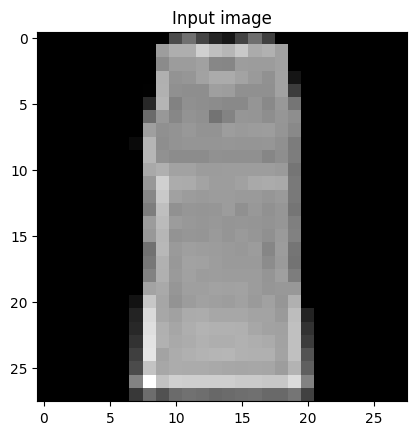

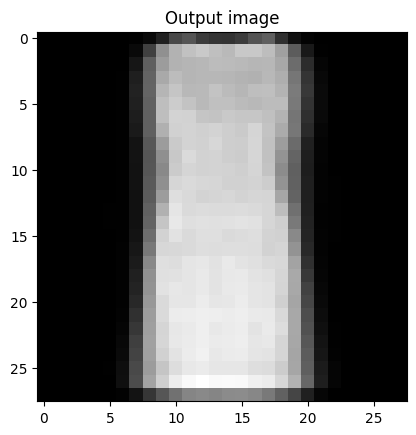

In [ ]:
plt.figure()
img = 2
plt.imshow(x_test[img].reshape(28,28),'gray')
plt.title('Input image')
result = autoencoder.predict(x_test[img].reshape(1,784))
print(result.shape)
plt.figure()
plt.imshow(result.reshape(28,28),'gray')
plt.title('Output image')

In [ ]:
input = Input(shape=(2,))
decoder1=autoencoder.layers[7] (input)
decoder2=autoencoder.layers[8] (decoder1)
decoder3=autoencoder.layers[9] (decoder2)
decoder4=autoencoder.layers[10] (decoder3)
decoder5=autoencoder.layers[11] (decoder4)
decoder6=autoencoder.layers[12] (decoder5)

model = Model(input,decoder6)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 16)                48        
                                                                 
 dense_7 (Dense)             (None, 64)                1088      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 784)               4021

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 16)                48        
                                                                 
 dense_7 (Dense)             (None, 64)                1088      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 784)               4021

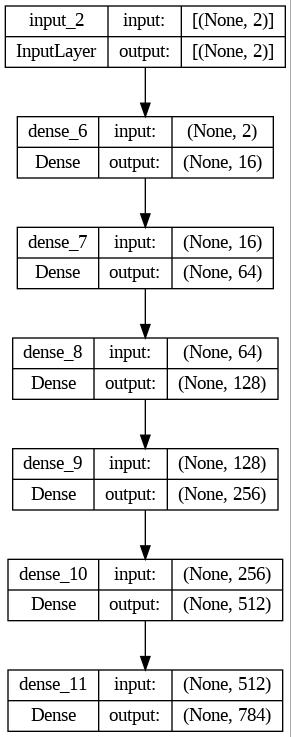

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
plot_model(model, to_file='autoencoder.jpg', show_shapes=True)

In [ ]:
output = model.predict(x_test_pca)

219/219 [==============================] - 1s 2ms/step


(784,)


Text(0.5, 1.0, 'Output image')

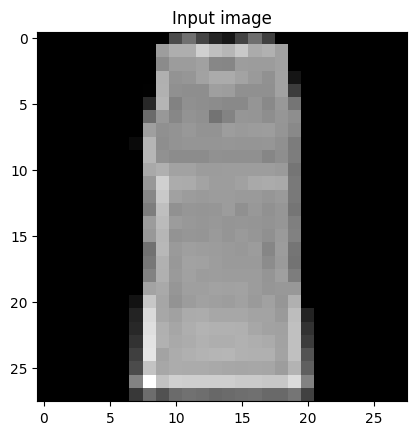

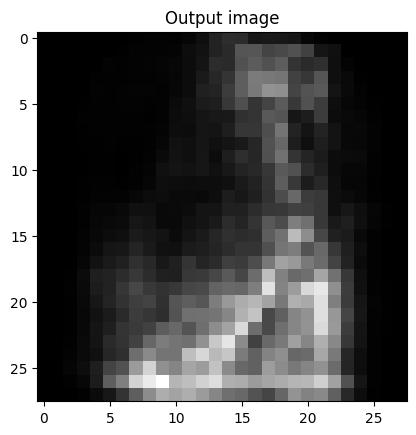

In [ ]:
plt.figure()
img = 2
plt.imshow(x_test[img].reshape(28,28),'gray')
plt.title('Input image')
print(output[img].shape)
plt.figure()
plt.imshow(output[img].reshape(28,28),'gray')
plt.title('Output image')

In [ ]:
history_auto = model.fit(x_train_pca, x_train, epochs=60, shuffle=True)

Epoch 1/60
1969/1969 [==============================] - 9s 4ms/step - loss: 0.0413
Epoch 2/60
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0365
Epoch 3/60
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0363
Epoch 4/60
1969/1969 [==============================] - 7s 4ms/step - loss: 0.0361
Epoch 5/60
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0361
Epoch 6/60
1969/1969 [==============================] - 7s 4ms/step - loss: 0.0360
Epoch 7/60
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0360
Epoch 8/60
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0359
Epoch 9/60
1969/1969 [==============================] - 7s 4ms/step - loss: 0.0359
Epoch 10/60
1969/1969 [==============================] - 8s 4ms/step - loss: 0.0359
Epoch 11/60
1969/1969 [==============================] - 7s 4ms/step - loss: 0.0359
Epoch 12/60
1969/1969 [==============================] - 7s 4ms/step - loss: 0.0358
E

Text(0.5, 0, 'Epochs')

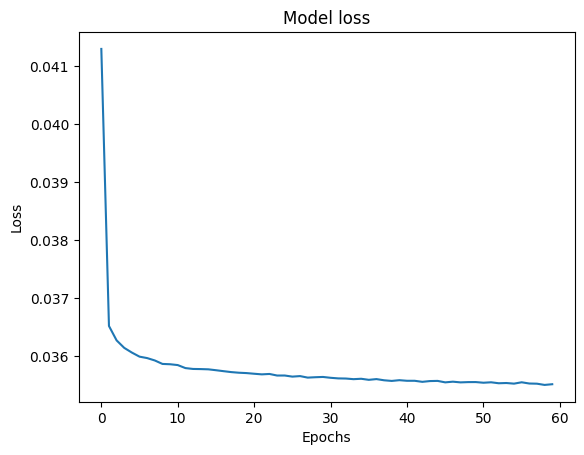

In [ ]:
plt.plot(history_auto.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
output = model.predict(x_test_pca)

219/219 [==============================] - 0s 2ms/step


(784,)


Text(0.5, 1.0, 'Output image')

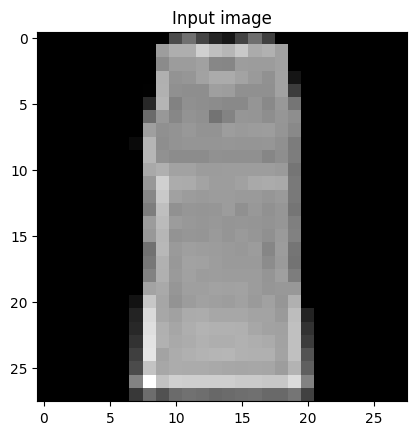

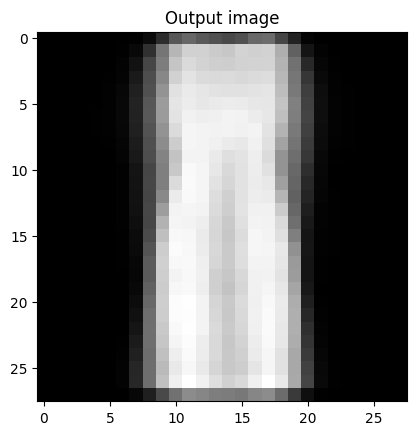

In [ ]:
plt.figure()
img = 2
plt.imshow(x_test[img].reshape(28,28),'gray')
plt.title('Input image')
print(output[img].shape)
plt.figure()
plt.imshow(output[img].reshape(28,28),'gray')
plt.title('Output image')